array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'asbestos exposure'}>,
        <Axes: title={'center': 'type of MM'}>,
        <Axes: title={'center': 'duration of asbestos exposure'}>],
       [<Axes: title={'center': 'diagnosis method'}>,
        <Axes: title={'center': 'keep side'}>,
        <Axes: title={'center': 'cytology'}>,
        <Axes: title={'center': 'duration of symptoms'}>,
        <Axes: title={'center': 'dyspnoea'}>,
        <Axes: title={'center': 'ache on chest'}>],
       [<Axes: title={'center': 'weakness'}>,
        <Axes: title={'center': 'habit of cigarette'}>,
        <Axes: title={'center': 'performance status'}>,
        <Axes: title={'center': 'white blood'}>,
        <Axes: title={'center': 'cell count (WBC)'}>,
        <Axes: title={'center': 'hemoglobin (HGB)'}>],
       [<Axes: title={'center': 'platelet count (PLT)'}>,
        <Axes: title={'ce

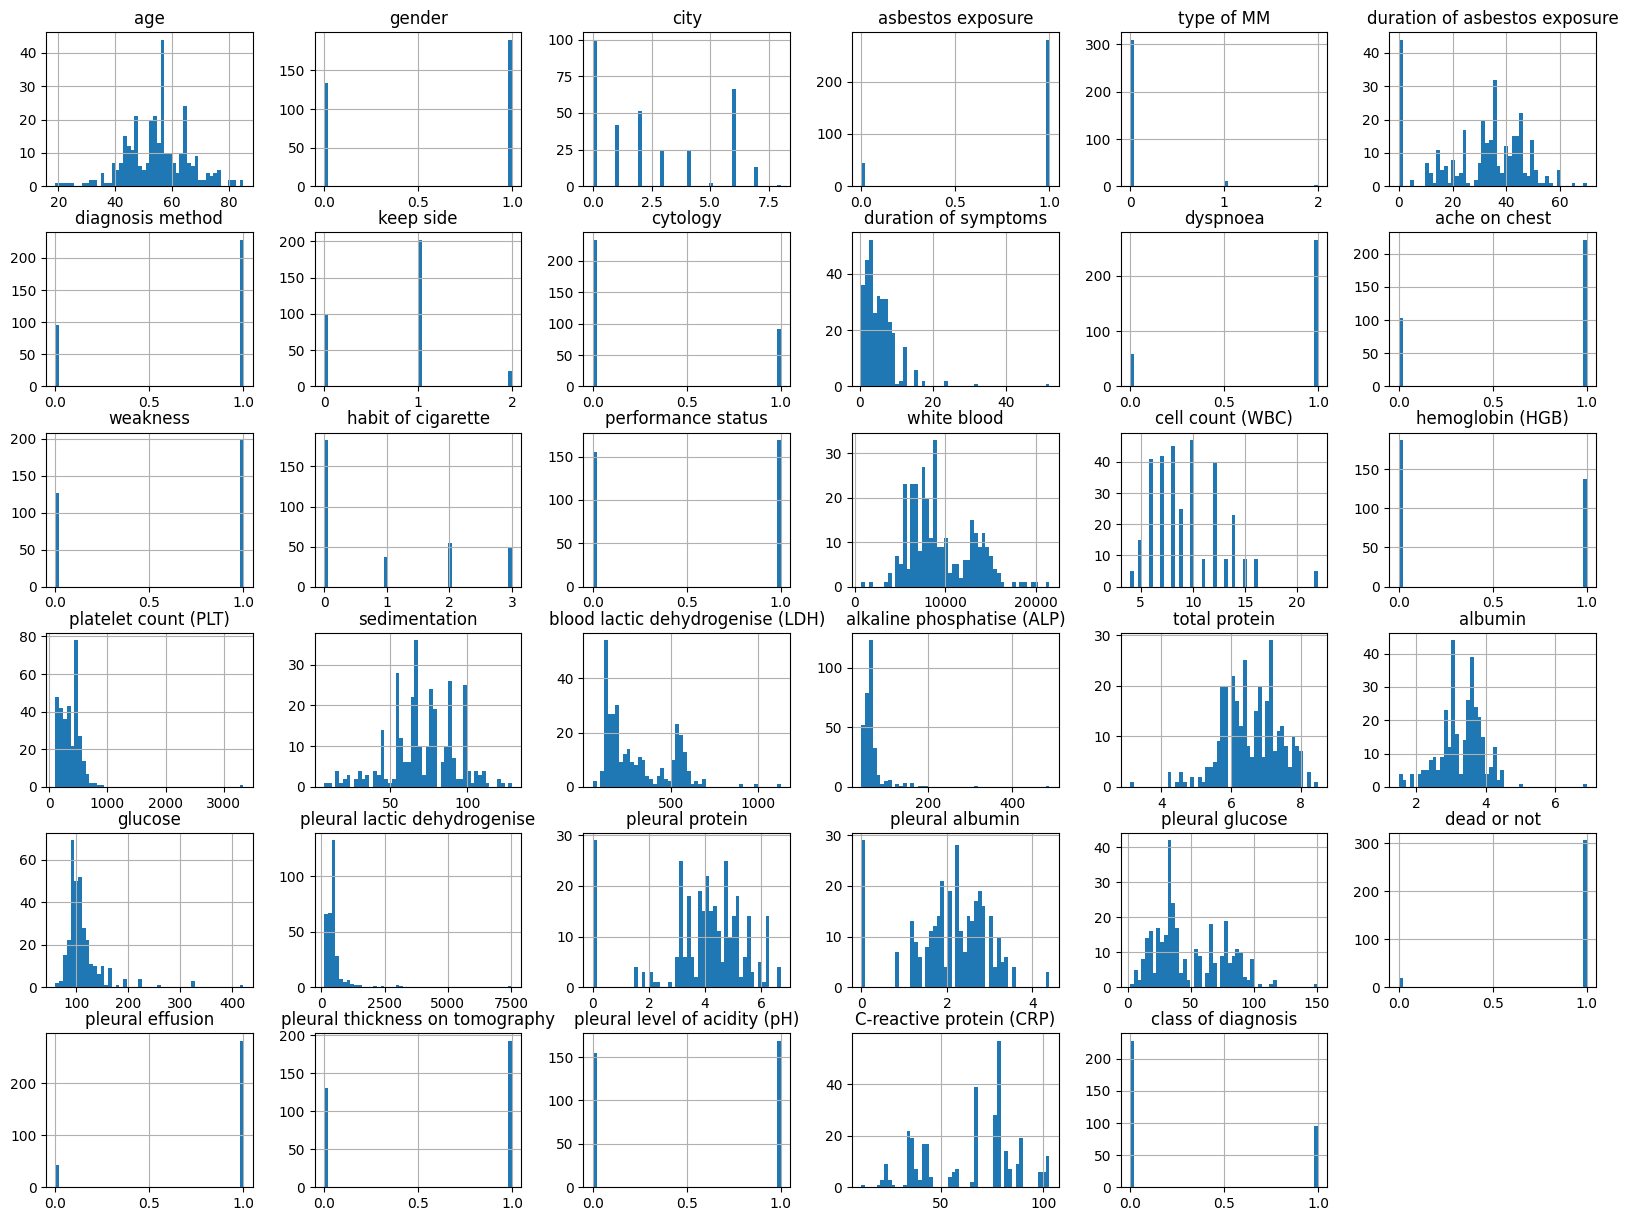

In [2]:
import pandas as pd
from pylab import *
import matplotlib.pyplot as plot

# 读取数据集
df = pd.read_csv("Mesothelioma.csv",header=0)
df.hist(bins=50,figsize=(20,15))

In [3]:
df_value_ravel = df.values.ravel()
print(u'数据中的缺失值个数：', len(df_value_ravel[df_value_ravel==np.nan]))

数据中的缺失值个数： 0


In [4]:
df = pd.get_dummies(df, columns=['city', 'keep side', 'habit of cigarette'])

# 输出编码后的数据集
df.head()

,age,gender,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,cytology,duration of symptoms,dyspnoea,ache on chest,...,city_6,city_7,city_8,keep side_0,keep side_1,keep side_2,habit of cigarette_0,habit of cigarette_1,habit of cigarette_2,habit of cigarette_3
0,47,1,1,0,20,1,1,24.0,1,1,...,False,False,False,True,False,False,False,False,True,False
1,55,1,1,0,45,1,0,1.0,1,1,...,False,False,False,True,False,False,False,False,False,True
2,29,1,1,0,23,0,0,1.0,0,0,...,False,False,False,False,True,False,False,False,True,False
3,39,1,1,0,10,1,0,3.0,0,1,...,False,False,False,True,False,False,True,False,False,False
4,47,1,1,0,10,1,1,1.5,1,1,...,False,False,False,False,True,False,False,False,False,True


In [5]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

y = df['class of diagnosis']
x = df.drop(['class of diagnosis','diagnosis method'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=421)

决策树

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        45
           1       0.67      0.30      0.41        20

    accuracy                           0.74        65
   macro avg       0.71      0.62      0.62        65
weighted avg       0.72      0.74      0.70        65

[[42  3]
 [14  6]]
Accuracy:  0.7384615384615385


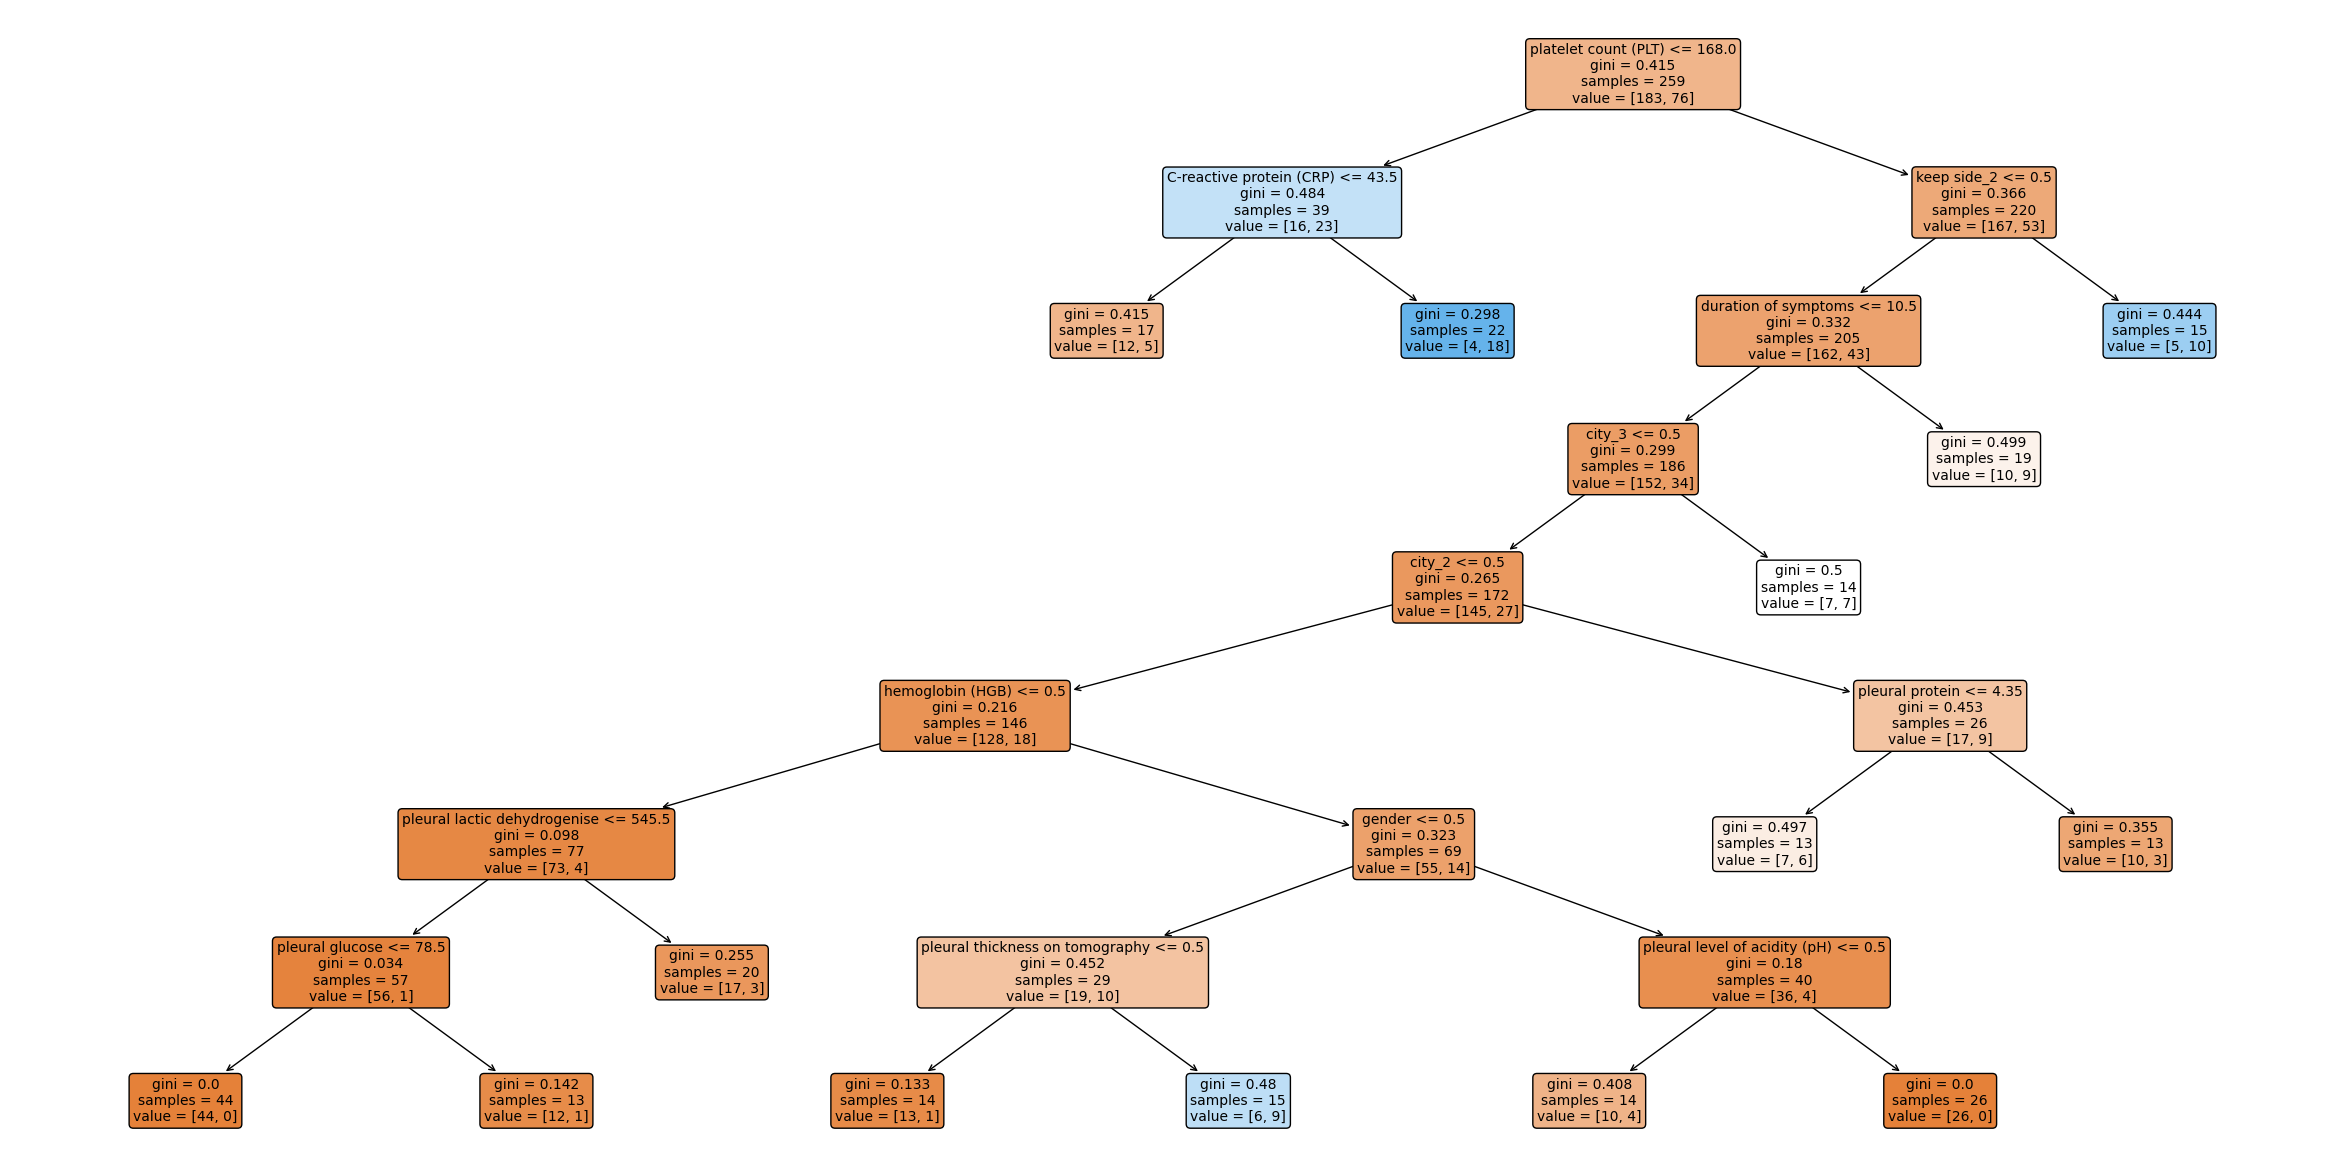

In [11]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(min_samples_leaf=13)
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test,y_predict))
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

# 模型可视化
plt.figure(figsize=(30, 15))
tree.plot_tree(clf, feature_names=x_train.columns.tolist(),
               filled=True, rounded=True, fontsize=10)
plt.show()

knn

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 创建标准化对象
scaler = StandardScaler()

# 对训练集进行标准化
x_train_scaled = scaler.fit_transform(x_train)

# 对测试集进行标准化
x_test_scaled = scaler.transform(x_test)

# 创建k近邻分类器
knn_model = KNeighborsClassifier(n_neighbors=7)

# 训练模型
knn_model.fit(x_train_scaled, y_train)

# 预测测试集
y_pred = knn_model.predict(x_test_scaled)

# 模型性能评估
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        45
           1       0.70      0.35      0.47        20

    accuracy                           0.75        65
   macro avg       0.73      0.64      0.65        65
weighted avg       0.74      0.75      0.73        65

[[42  3]
 [13  7]]
0.7538461538461538


svm

In [131]:
from sklearn.decomposition import PCA
pca = PCA(copy=True, n_components=1, whiten=False, random_state=1)
x_new = pca.fit_transform(x)

print(u'所保留的1个主成分的方差贡献率为：')
print(pca.explained_variance_ratio_)

所保留的1个主成分的方差贡献率为：
[0.96929749]


In [132]:
from sklearn import svm

x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(
    x, y, test_size=.2)
# 创建SVM分类器
svm_classifier = svm.SVC(kernel='linear')

# 训练模型
svm_classifier.fit(x_pca_train, y_pca_train)

# 预测测试集
y_pred = svm_classifier.predict(x_pca_test)

print(metrics.classification_report(y_pca_test, y_pred,zero_division=1))
print(metrics.confusion_matrix(y_pca_test, y_pred))
print(metrics.accuracy_score(y_pca_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76        43
           1       0.46      0.27      0.34        22

    accuracy                           0.65        65
   macro avg       0.58      0.55      0.55        65
weighted avg       0.61      0.65      0.62        65

[[36  7]
 [16  6]]
0.6461538461538462


贝叶斯

In [133]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        45
           1       0.38      0.55      0.45        20

    accuracy                           0.58        65
   macro avg       0.56      0.57      0.56        65
weighted avg       0.64      0.58      0.60        65

[[27 18]
 [ 9 11]]
0.5846153846153846


adaboost

In [134]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base classifier (you can choose another classifier if you want)
base_classifier = DecisionTreeClassifier(min_samples_leaf=6)

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_classifier, n_estimators=150, random_state=42)

# Fit the model on the training data
adaboost_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        45
           1       0.43      0.15      0.22        20

    accuracy                           0.68        65
   macro avg       0.57      0.53      0.51        65
weighted avg       0.62      0.68      0.62        65

[[41  4]
 [17  3]]
0.676923076923077


随机森林

In [162]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf_classifier = RandomForestClassifier(min_samples_leaf=9)

# 训练模型
rf_classifier.fit(x_train, y_train)

# 预测测试集
y_pred = rf_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        45
           1       0.00      0.00      0.00        20

    accuracy                           0.69        65
   macro avg       0.35      0.50      0.41        65
weighted avg       0.48      0.69      0.57        65

[[45  0]
 [20  0]]
0.6923076923076923


e:\python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
